# Coupled Pendula

We will continue our course with some physical problems, we are going to tackle. One of the more extensive solutions will consider two coupled pendula. This belongs to the class of coupled oscillators, which are extremely important. They will later yield propagating waves. They are important for phonons, i.e. coupled vibration of atoms in solids, but there are also many other axamples. One can realize the coupled oscillation on different ways. He we will do that not with spring oscillators, by with pendula. 

import Cell from '@nteract/presentational-components/src/components/cell';

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from time import sleep,time
from threading import Thread
from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Description of the problem

### Sketch



The image below depicts the sitution we would like to cover in our first project. These are two pendula, which have the length $L_{1}$ and $L_{2}$. Both are coupled with a spring of spring constant $k$, which is relaxed, when both pendula are at rest. You may want to include a generalized version where the spring is mounted at a distance $c$ from the turning points of the pendula.

If you develop the equation of motion, write down as a sum of torques. Use one equation of motion for each pendulum. The result will be two coupled differential equations for the angular coordinates. They are solved by the scipy odeint function without any friction.

![Figure 1](img/pendulum.png)

### Equations of motion

The equations of motion of the two coupled pendula have the following form:

\begin{eqnarray}
I_{1}\ddot{\theta_{1}}&=&-m_{1}gL_{1}\sin(\theta_{1})-kc^2[\sin(\theta_{1})-\sin(\theta_{2})]\\
I_{2}\ddot{\theta_{2}}&=&-m_{2}gL_{2}\sin(\theta_{2})+kc^2[\sin(\theta_{1})-\sin(\theta_{2})]
\end{eqnarray}

Here, $\theta_{1}, \theta_{2}$ measure the angle of the two pendula with the length $L_{1},L_{2}$. $k$ is the spring constant of the spring coupling both pendula. If you use a variable coupling position of the spring name the length of the coupling from the turning point $c$.



## Solving the problem

### Setting up the function

In our previous lecture, we used the *odeint* function of scipy to solve the driven damped harmonic oscillator.
Remeber that we used the array 

~~~
state[0] -> position
state[1] -> velocity
~~~


to exchange position and velocity with the solver via the function that defines the physical problem

~~~
def SHO(state, time):
    g0 = state[1]               ->velocity
    g1 = -k/m * state [0]       ->acceleration
    return np.array([g0, g1])
~~~    

for a coupled system of different equations, we can now extend the *state* array. In the case of the coupled system of equations it has the following structure
    

~~~
def SHO(state, time):
    g0 = how the velocity of object 1 depends on the velocities of all objects
    g1 = how the acceleration of object 1 depends on the acceleration of all objects
    g2 = how the velocity of object 2 depends on the velocities of all objects
    g3 = how the acceleration of object 2 depends on the acceleration of all objects
    return np.array([g0, g1])
~~~ 

So the state vector just gets longer and the coupling is in the definition of the velocities and accelerations. The results are then the positions and velocities of the objects. 
Use this type of scheme to define the problem and write a function, which returns the state of the objects as before.

In [2]:
def coupled_pendula(state,t):
    g0=state[1]
    g1=(-k*c**2/m/L1**2-g/L1)*np.sin(state[0])+k*c**2*np.sin(state[2])/m/L1**2
    g2=state[3]
    g3=(-k*c**2/m/L2**2-g/L2)*np.sin(state[2])+k*c**2*np.sin(state[0])/m/L2**2
    return np.array([g0,g1,g2,g3])

### Define initial parameters

We want to define some parameters of the pendula

* length of the pendulum 1, $L_1$=3
* length of the pendulum 2, $L_2$=3
* gravitational acceleration, $g=9.81$
* mass at the end of the pendula, $m=1$
* distance where the coupling spring is mounted, $c=2$
* spring constant of the coupling spring, $k=5$

In [3]:
# Initial parameters
# mass m1, m2, length of pendula L1, L2, position of the coupling, spring constant k, gravitational acceleration
L1=3 # length of pendulum 1
L2=3 # length of pendulum 2
g=9.81 # gravitational acceleration
m=1    # mass of at each of the pendula
c=2  # coupling distance from the mount
k=0.5    # coupling spring constant

As compared to our previous problem of a damped driven pendulum, where we had two initial conditions for the second order differential equation, we have now two second order differential equation.
We therefore need 4 initial parameters, which are the initial elongations of both pendula and their corresponding initial angular velocities We will notice, that the solution,i.e. the motion of the pendula, will strongly depend on the initial conditions.

In [4]:
# inital angles, initial angular velocities
a=np.pi/12   # initial angle for pendulum 1
b=np.pi/20  # initial angle for pendulum 2
o1=0.0        # initial angular velocity for pendulum 1
o2=0.0        # initial angular velocity for pendulum 2


#define the initial state
state=np.zeros(4)
state=a,o1,b,o2

### Solve the equation of motion

We have to define a timeperiod over which we would like to obtain the solution. We use here a period of 400s where we calculate the solution at 10000 points along the 400s.

In [5]:
# Solution
time=400  # total time to be simulated (in seconds)
N=10000   # number of timesteps for the simulation
t=np.linspace(0,time,N) # times at which the amplitudes shall be calculated

We are now ready to calculate the solution. Finally, we extract also the angles of the individual pendula, their angular velocities and the position of the point masses at the end of the pendulum. This can be then readily used to create some animation.

In [6]:
#solve the differential equations
answer=odeint(coupled_pendula,state,t)

# angles 
theta1=answer[:,0]
theta2=answer[:,2]

# angular velocities
omega1=answer[:,1]
omega2=answer[:,3]

#cordinates of the two masses at the end of the pendulum
xdata1=L1*np.sin(theta1)
xdata2=L2*np.sin(theta2)
ydata1=L1*np.cos(theta1)
ydata2=L2*np.cos(theta2)

### Plotting

First, get some impression of how the angles change over time. 

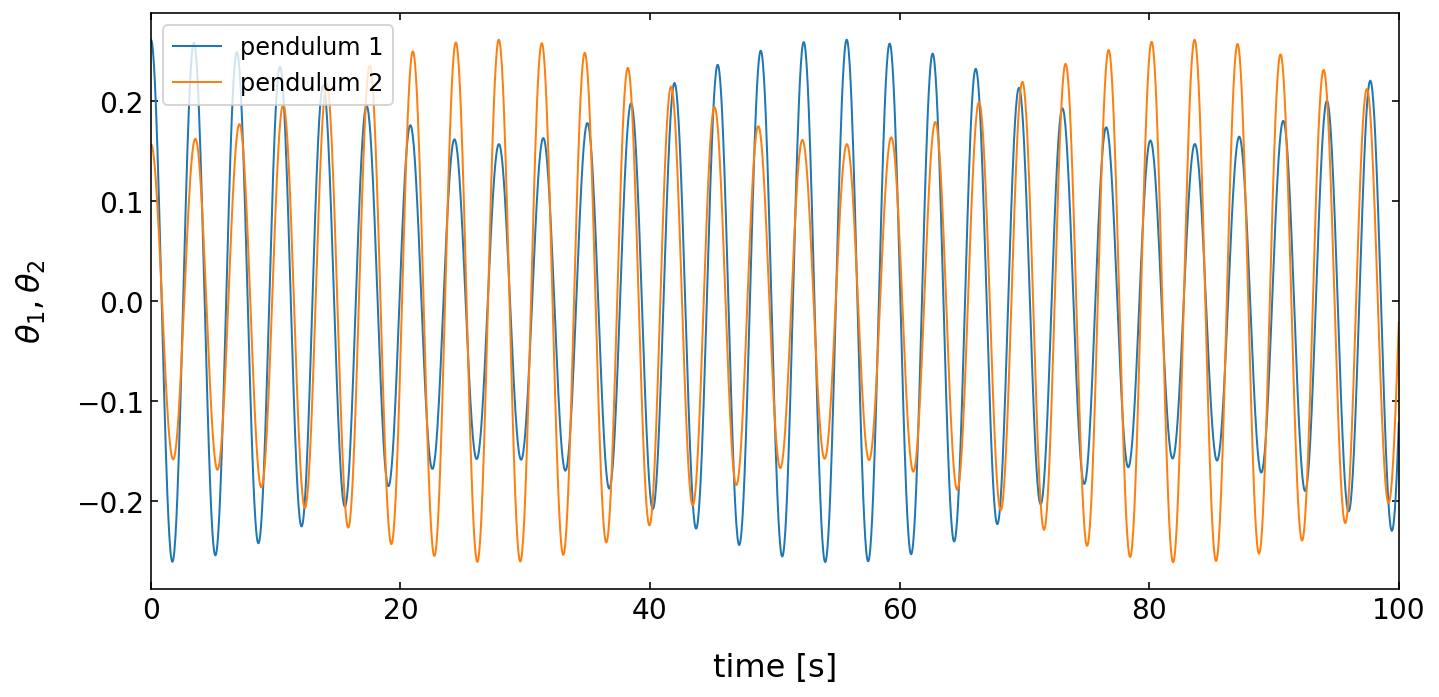

In [7]:
# Plotting angles over time
plt.figure(figsize=(10,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta_1,\theta_2$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1,label='pendulum 1')
plt.plot(t,theta2,label='pendulum 2')
plt.legend()
plt.tight_layout()  
plt.xlim(0,100)
plt.show()

### Animation

The plot of the angles over time is not always giving a good insight. With our knowledge about animations, we may easily animate the motion of the two pendula as well.

In [8]:
## create our canvas
canvas = Canvas(width=300, height=200)

For the physics, it has neven been interesting to define at which distance the pendula are mounted at a ceiling for example. For drawing them we have to do that together with some additional parameters, which define for example the position of where to draw in the canvas and the conversion of *meters* to *pixels*.

In [9]:
distance=2 # distance of the pendula in m
scale=40 # scale meter to pixels, 1 meter = 40 pixels
off_x=canvas.width/2 # horizontal center of the canvas
off_y=0 # top of the canvas

The function below will do the drawing for us. We define a function such that we can create a background animation with a `thread`. Note that we have inserted `sleep(t[1]-t[0])` at the end. The drawing of the 4 objects will be pretty fast so that we can wait a certain amount of time until we display the next frame. That means at the end, that our simulation will run in real time. 

In [394]:
def draw():
    for i in range(len(xdata1)):
        canvas.line_width = 1
        canvas.fill_style = 'red' # fill color for the particles
        canvas.global_alpha = 1 # make the slightly transparent


        with hold_canvas(canvas):
            canvas.clear() # clear the canvas before drawing
            ##draw the two connections to the ceiling
            canvas.begin_path()            
            canvas.move_to(scale*distance/2+off_x, off_y)
            canvas.line_to((xdata1[i]+distance/2)*scale+off_x, ydata1[i]*scale+off_y)
            canvas.move_to(-scale*distance/2+off_x, off_y)
            canvas.line_to((xdata2[i]-distance/2)*scale+off_x, ydata2[i]*scale+off_y)
            canvas.stroke()       
            ## draw the two masses
            canvas.fill_arc((xdata1[i]+distance/2)*scale+off_x, ydata1[i]*scale+off_y, 10, 0, 2*np.pi) 
            canvas.fill_arc((xdata2[i]-distance/2)*scale+off_x, ydata2[i]*scale+off_y, 10, 0, 2*np.pi) 
            ## sleep a timestep after drawing
            sleep(t[1]-t[0]) 

In [398]:
simulation = Thread(target=draw)  

Looks pretty slow, but remember the pendula are 3 meters long.

In [399]:
display(canvas)
simulation.start() 

Canvas(height=200, width=300)

![](motion.mov)

## Normal Modes

We will not cover all the physical details here, but you might remember your mechanis lectures, that two coupled oscillators show distinct modes of motion, which we would call the normal modes. Four two coupled pendula there are two normal modes, where both pendula move with the same frequency. We may force the system into one of its normal modes, by specifying its initial conditions properly. 

### In-phase motion

The first one, will create an in-phase motion of the two pendula by setting their initial elongation equal, i.e. $\theta_{1}(t=0)=\theta_{2}(t=0)$. Both pendula then oscillate with their natural frequency and the coupling spring is never elongated. 

In [31]:
# inital angles, initial angular velocities
a=np.pi/12   # initial angle for pendulum 1
b=np.pi/12   # initial angle for pendulum 2
o1=0.0        # initial angular velocity for pendulum 1
o2=0.0        # initial angular velocity for pendulum 2


#define the initial state
state=np.zeros(4)
state=a,o1,b,o2



In [32]:
#solve the differential equations
answer=odeint(coupled_pendula,state,t)

# angles 
theta1=answer[:,0]
theta2=answer[:,2]

# angular velocities
omega1=answer[:,1]
omega2=answer[:,3]

#cordinates of the two masses at the end of the pendulum
xdata1=L1*np.sin(theta1)
xdata2=L2*np.sin(theta2)
ydata1=L1*np.cos(theta1)
ydata2=L2*np.cos(theta2)


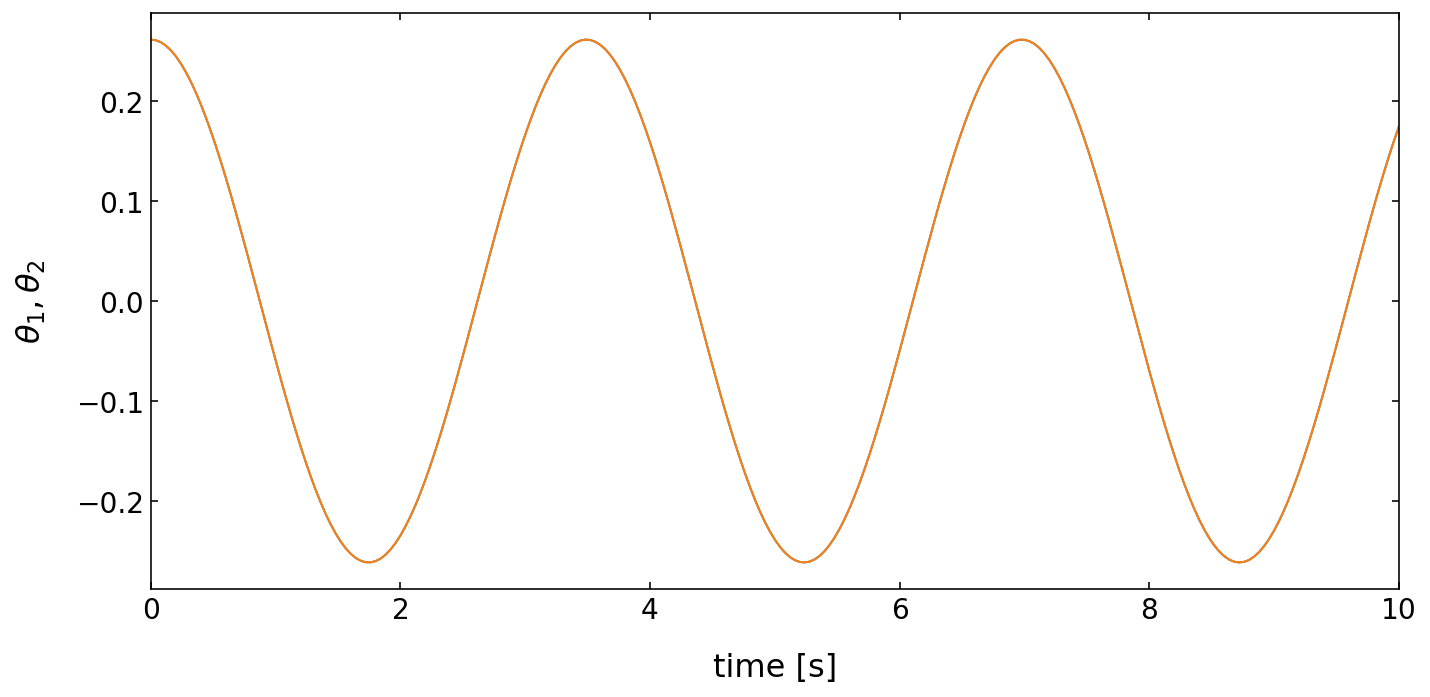

In [33]:
# Plotting angles over time
plt.figure(figsize=(10,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta_1,\theta_2$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1)
plt.plot(t,theta2)
plt.tight_layout()  
plt.xlim(0,10)
plt.show()

### Out-of-phase motion

The second one, will create a motion in which the two pendula are out-of-phase by a phase angle of $\pi$ , i.e. $\theta_{1}(t=0)=-\theta_{2}(t=0)$. Both pendula then oscillate with a frequency higher than their natural frequency. This is due to the fact that there is a higher restoring force due to the action of the spring. 

In [348]:
# inital angles, initial angular velocities
a=np.pi/12   # initial angle for pendulum 1
b=-np.pi/12   # initial angle for pendulum 2
o1=0.0        # initial angular velocity for pendulum 1
o2=0.0        # initial angular velocity for pendulum 2


#define the initial state
state=np.zeros(4)
state=a,o1,b,o2

In [349]:
#solve the differential equations
answer=odeint(coupled_pendula,state,t)

# angles 
theta1=answer[:,0]
theta2=answer[:,2]

# angular velocities
omega1=answer[:,1]
omega2=answer[:,3]

#cordinates of the two masses at the end of the pendulum
xdata1=L1*np.sin(theta1)
xdata2=L2*np.sin(theta2)
ydata1=L1*np.cos(theta1)
ydata2=L2*np.cos(theta2)

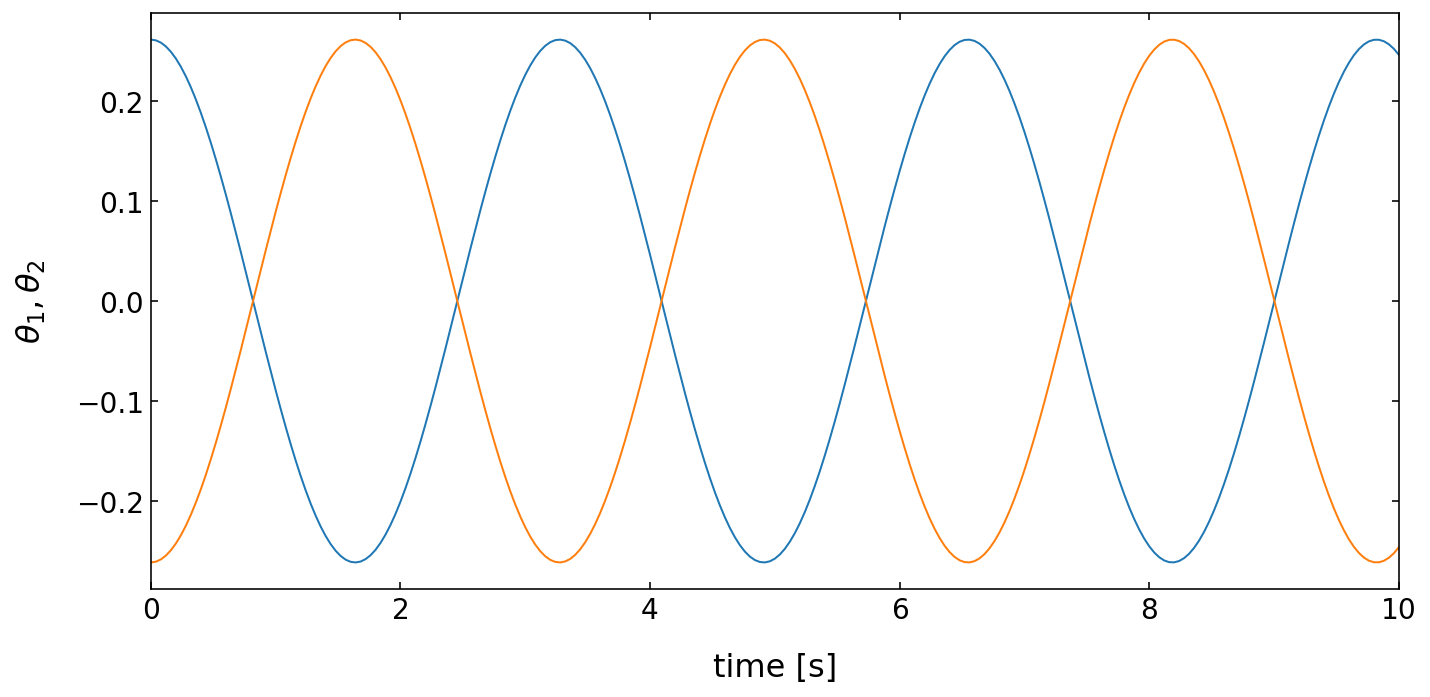

In [350]:
# Plotting angles over time
plt.figure(figsize=(10,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta_1,\theta_2$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1)
plt.plot(t,theta2)
plt.tight_layout()  
plt.xlim(0,10)
plt.show()

### Beat case

The last case is not a normal mode but represents a more general case. We start with two different initial angles, i.e. $\theta_{1}(t=0)=\pi/12$ and $\theta_{2}(t=0)=0$. This is the so-called *beat* case, where the pendula exchange energy. The oscillation, which is at the beginning in only in the first pendulum is then transfer to the second one. This transfer of energy is continuously occurring from one pendulum to the other since there's nowhere for the energy to go. From this point it's easily to recognize how the wife is generated. In a set of many coupled pendula one pendulum is starting to oscillate and is transferring it's energy to the next one and then to the next one and then to the next one and this way the energy is propagating along all oscillators.

In [374]:
# inital angles, initial angular velocities
a=np.pi/12   # initial angle for pendulum 1
b=0   # initial angle for pendulum 2
o1=0.0        # initial angular velocity for pendulum 1
o2=0.0        # initial angular velocity for pendulum 2


#define the initial state
state=np.zeros(4)
state=a,o1,b,o2

In [375]:
#solve the differential equations
answer=odeint(coupled_pendula,state,t)

# angles 
theta1=answer[:,0]
theta2=answer[:,2]

# angular velocities
omega1=answer[:,1]
omega2=answer[:,3]

#cordinates of the two masses at the end of the pendulum
xdata1=L1*np.sin(theta1)
xdata2=L2*np.sin(theta2)
ydata1=L1*np.cos(theta1)
ydata2=L2*np.cos(theta2)


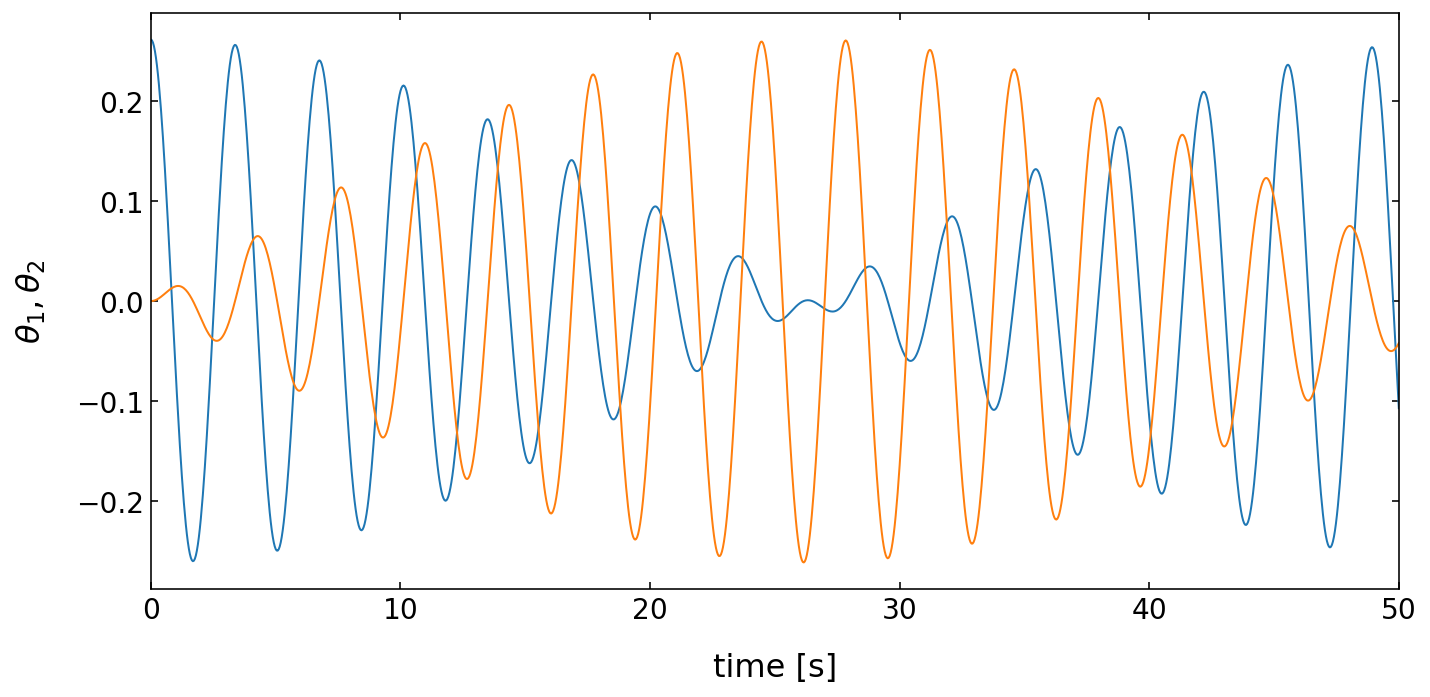

In [376]:
# Plotting angles over time
plt.figure(figsize=(10,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$\theta_1,\theta_2$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,theta1)
plt.plot(t,theta2)
plt.tight_layout()  
plt.xlim(0,50)
plt.show()

### Computation of energy (here for the beat case)

After we have had a look at the motion of the individual pendula, we may also check, the energies in the system. We have to calculate the potential and kinetic energies of the pendula and we should not forget the potential energy stored in the spring. 

#### Potential energy of the pendula

The potential energy plot below nicely shows the exchange of energy between the two pendula in the beat case.

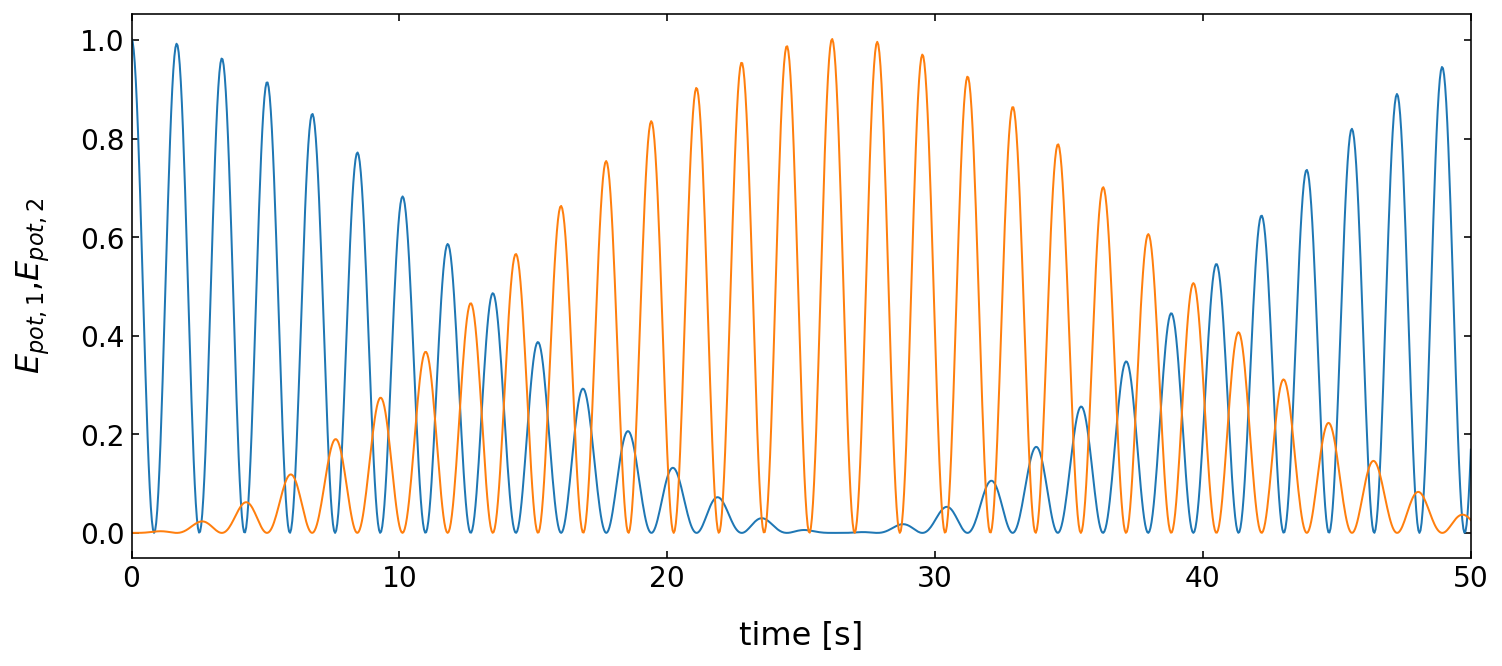

In [377]:
# calculate and plot the potential energies of each pendulum and plot dem independently
E_pot1=m*g*L1*(1-np.cos(theta1))
E_pot2=m*g*L2*(1-np.cos(theta2))

plt.figure(1,figsize=(12,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('$E_{pot,1}$,$E_{pot,2}$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,E_pot1)
plt.plot(t,E_pot2)
plt.xlim(0,50)
plt.show()

#### Potential energy of the spring

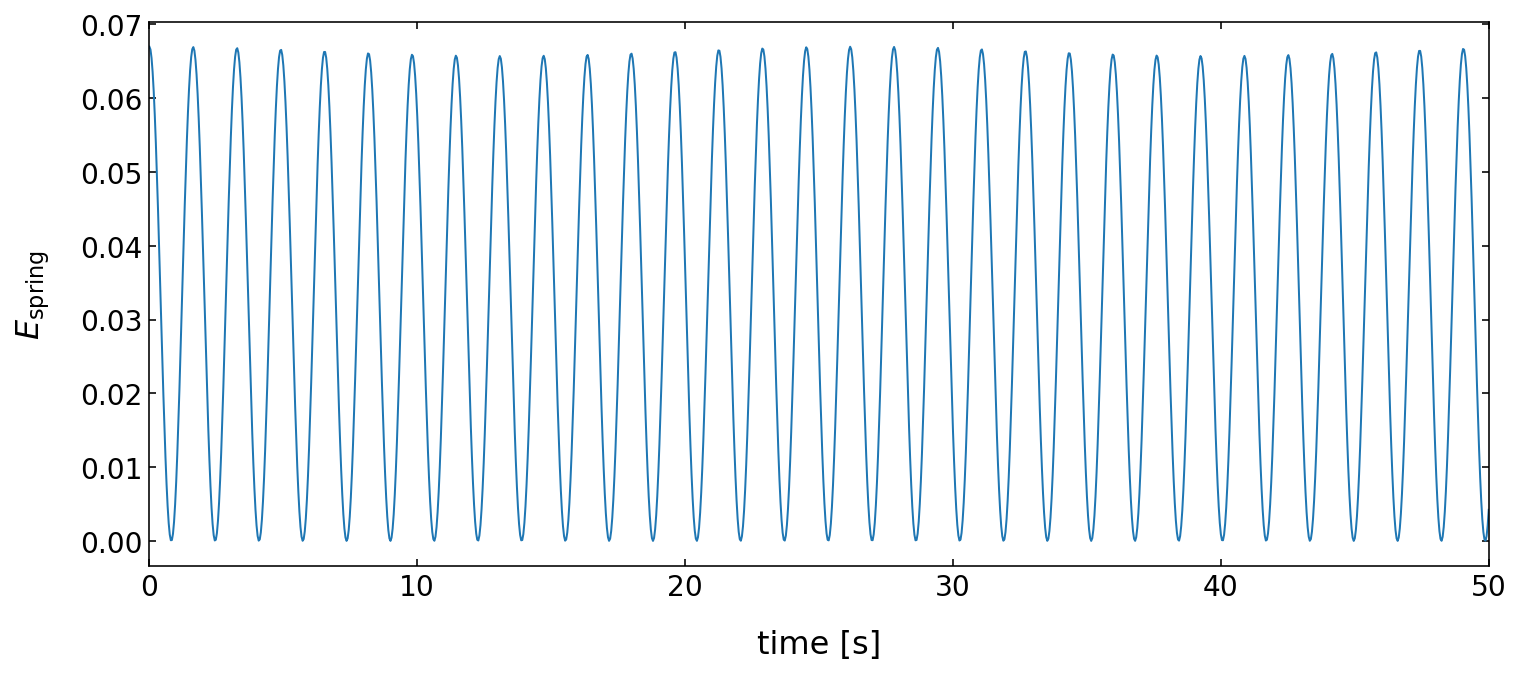

In [378]:
# calculate and plot the potential energy stored in the spring
d=c*(np.sin(theta1)-np.sin(theta2))
E_spring=k/2*d**2

plt.figure(3,figsize=(12,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('$E_{\mathrm{spring}}$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,E_spring)
plt.xlim(0,50)
plt.show()

#### Kinetic energies

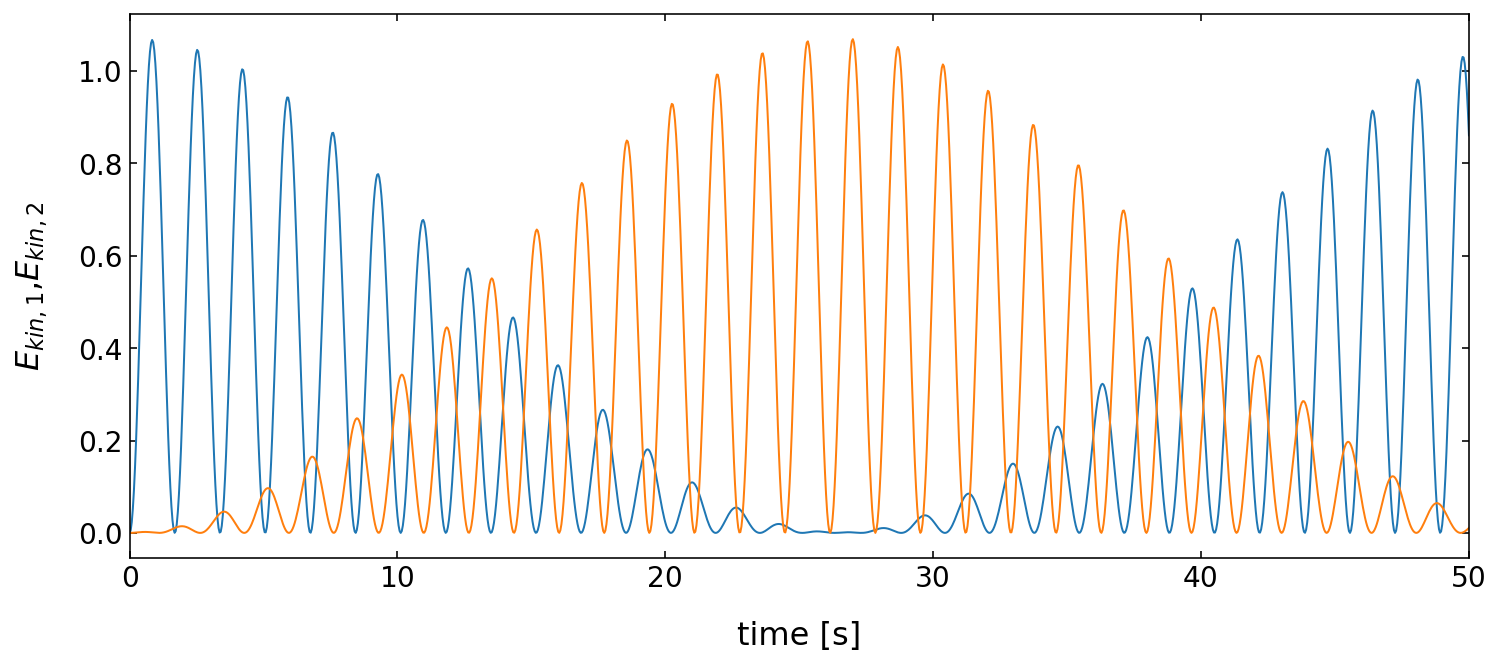

In [379]:
# calculate and plot the kinetic energies of each pendulum and plot dem independently
E_kin1=0.5*m*(omega1*L1)**2
E_kin2=0.5*m*(omega2*L2)**2

plt.figure(2,figsize=(12,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('$E_{kin,1}$,$E_{kin,2}$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,E_kin1)
plt.plot(t,E_kin2)
plt.xlim(0,50)
plt.show()

#### Total energy

As the total energy in the system shall nbe conserved, the sum of all energy contributions should yield a flat line.

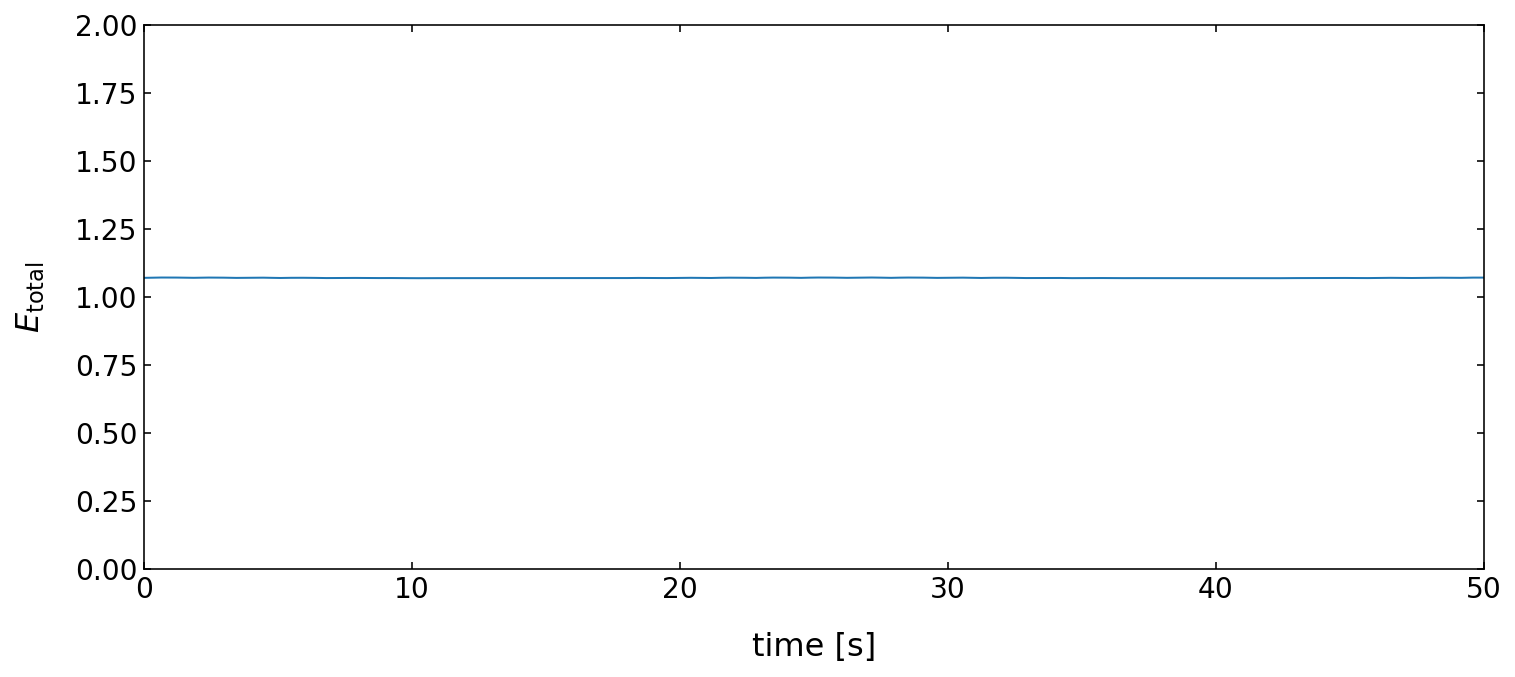

In [383]:
# calculate the total energy of the system
E_tot = E_pot1 + E_pot2 + E_kin1 + E_kin2 + E_spring

plt.figure(3,figsize=(12,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('$E_{\mathrm{total}}$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,E_tot)
plt.ylim(0,2)
plt.xlim(0,50)

plt.show()

#### Total energy exchange of the pendula

While the plot above Shows the total energy of both pendula we may now have a look at the total energy in each pendulum. The plots clearly show that the energy is exchanged between the two pendula. The residual ripples on the curve results from the fact that we here exclude the potential energy stored in the spring.

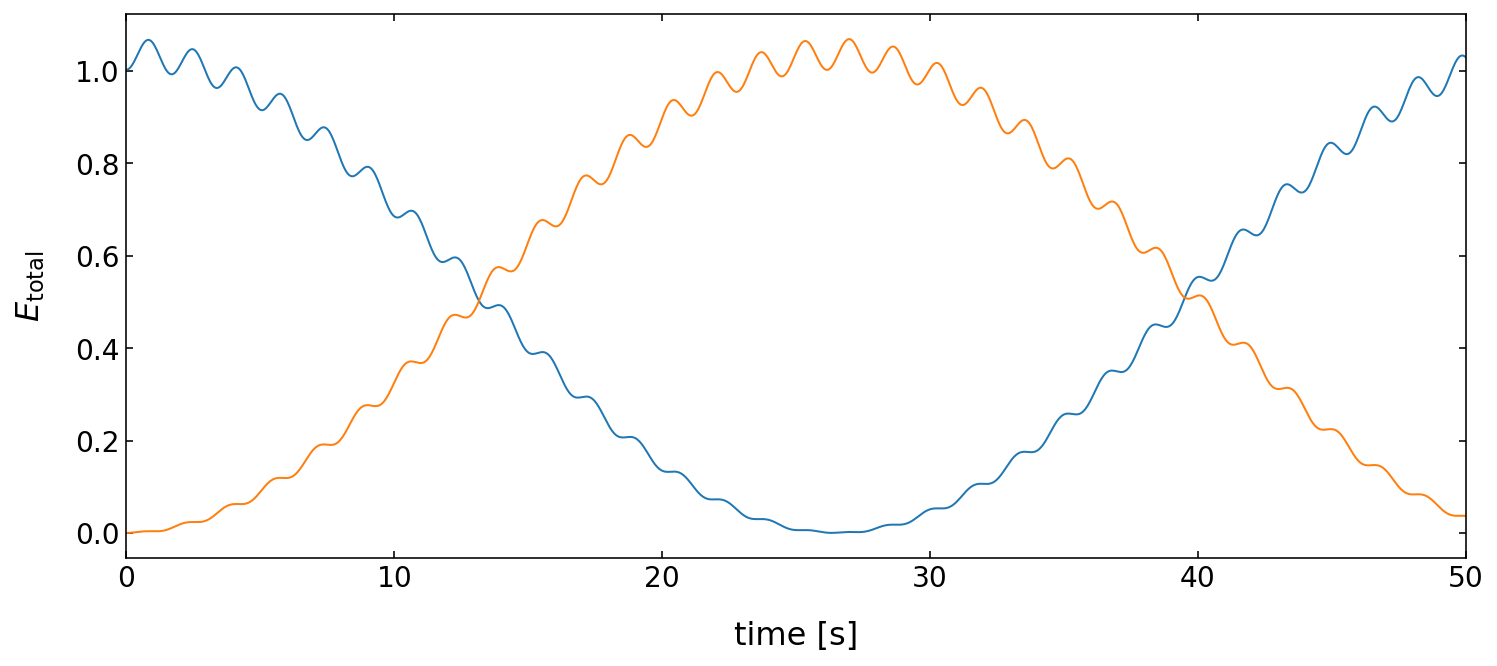

In [384]:
# calculate the total energy of the system
E_tot1 = E_pot1 + E_kin1
E_tot2 = E_pot2 + E_kin2

plt.figure(3,figsize=(12,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('$E_{\mathrm{total}}$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(t,E_tot1)
plt.plot(t,E_tot2)
plt.xlim(0,50)
plt.show()
